1.Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
print(customer_df.shape)
display(customer_df.head())

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [5]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")

5. Change effective to date column to datetime format.

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],dayfirst=False, yearfirst=False, format='mixed')

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [7]:
numerical_df = customer_df.select_dtypes('number')

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [9]:
continuous_df = numerical_df[['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount']]
discrete_df = numerical_df[['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
discrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_since_last_claim,9134.0,15.097000,10.073257,0.0,6.0,14.0,23.0,35.0
months_since_policy_inception,9134.0,48.064594,27.905991,0.0,24.0,48.0,71.0,99.0
number_of_open_complaints,9134.0,0.384388,0.910384,0.0,0.0,0.0,0.0,5.0
number_of_policies,9134.0,2.966170,2.390182,1.0,1.0,2.0,4.0,9.0


In [10]:
continuous_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


8. Plot a correlation matrix, comment what you see.

In [11]:
continuous_df.corr()
# cutomer lifetime value is slightly correlated to monthly premium payments 
# I would have expected higher positive correlation between income and montly premium, but it is negative. 
# the highest correlation in the matrix is between montly premium and total claims amount
# the ir a slight high negative correlation between income and total claims 

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.226451
income,0.024366,1.000000,-0.016665,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.632017
total_claim_amount,0.226451,-0.355254,0.632017,1.000000


In [12]:
discrete_df.corr()
# few overall correlations
# the highest correlation in the matrix is months_since_last_claim and months_since_policy_inception which is a negative correlation.

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
months_since_last_claim,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.009136,-0.013333,0.001498,1.000000


9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


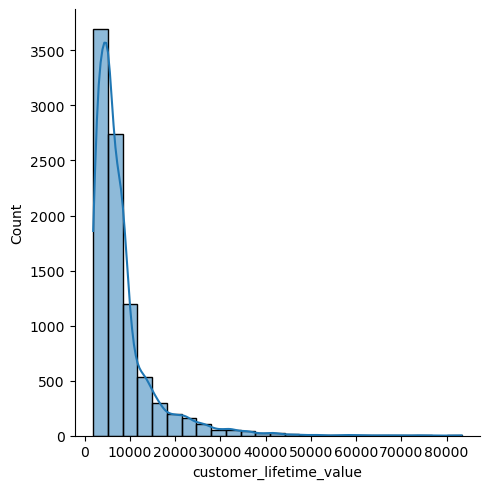

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


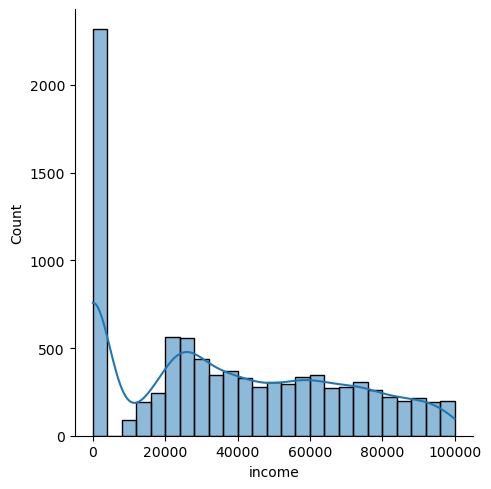

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


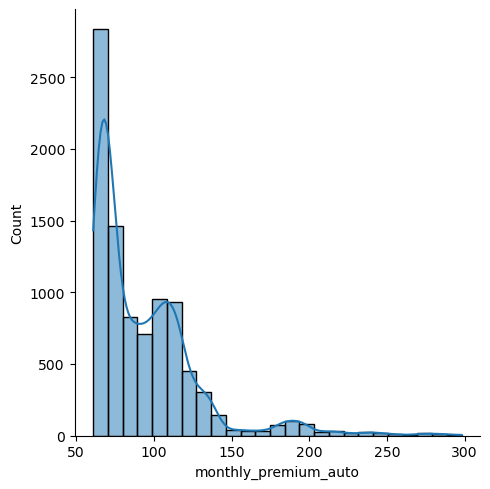

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


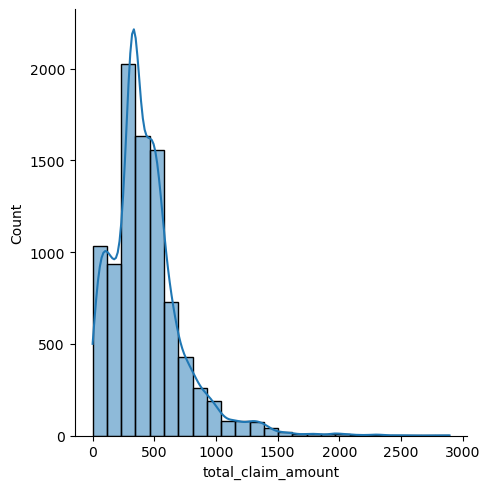

In [13]:
for column in continuous_df.columns:
    sns.displot(continuous_df[column],bins= 25, kde=True)
    plt.show()

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


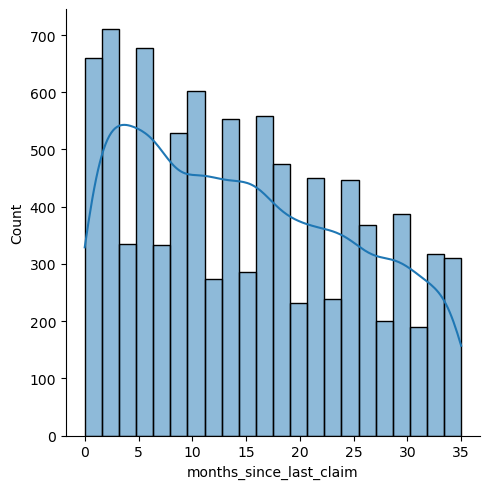

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


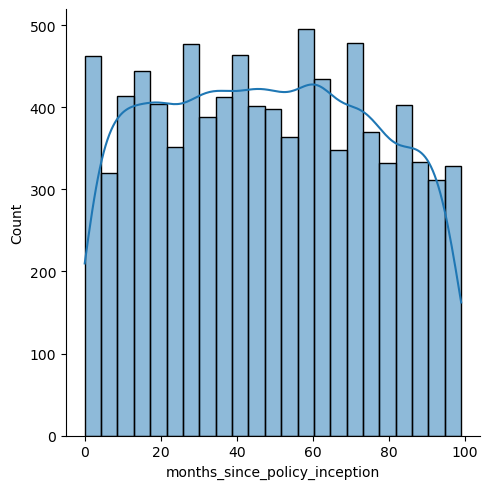

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


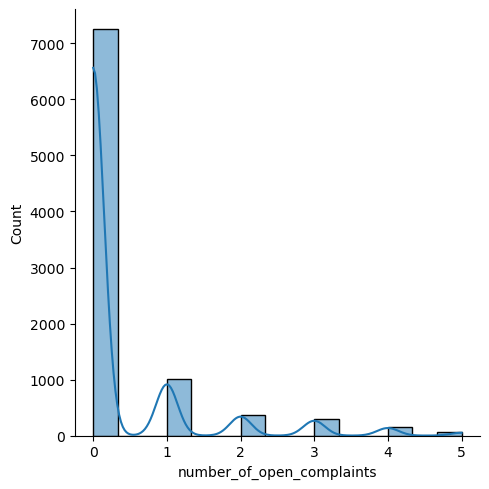

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


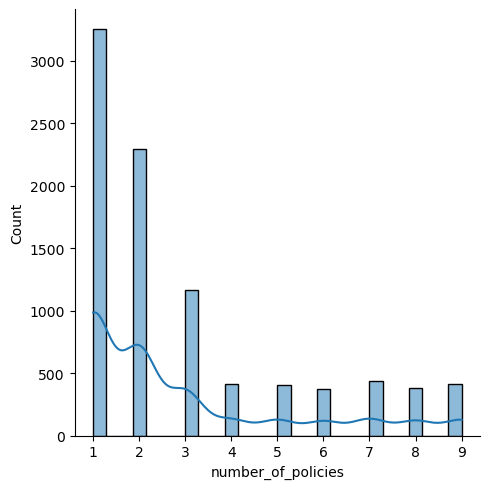

In [14]:
for column in discrete_df.columns:
    sns.displot(discrete_df[column],kde=True)
    plt.show()

10. Comment what you can see in the plots.

In [15]:
# discrete data doesn't suffer from extreme data points. I prefer to reduce the categories in the n. of months series
# Reagrding continuous data my major worries are:
# 1. income is affected by several null values
# 2. customer_lifetime_value, monthly_premium_auto and total_claim_amount have extreme point that we may need to cut

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

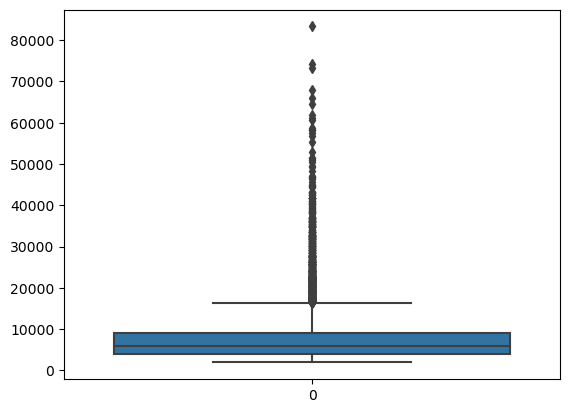

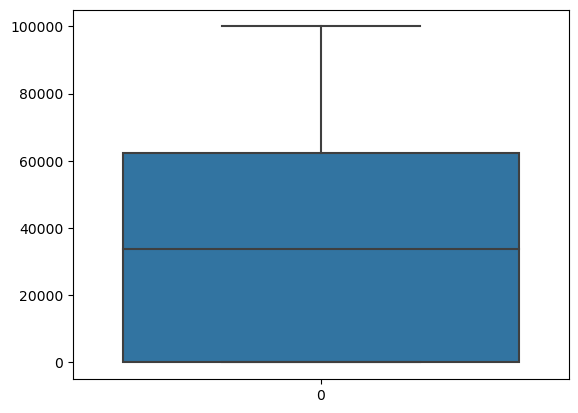

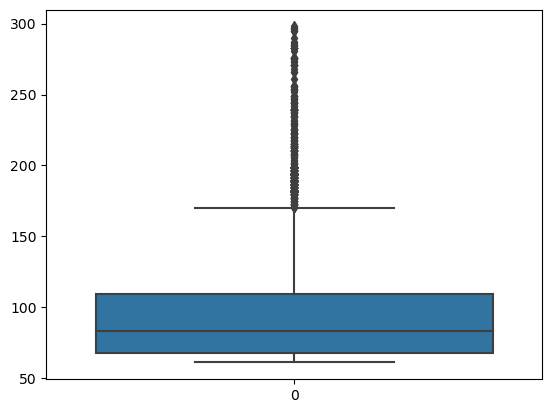

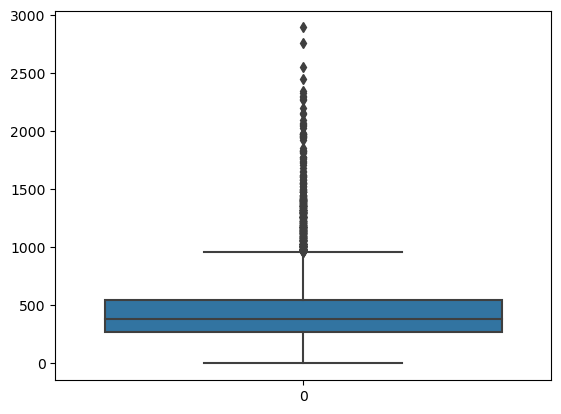

In [16]:
for column in continuous_df.columns:
    sns.boxplot(continuous_df[column])
    plt.show()

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [17]:
# I will remove the outliers that approximately are the 5% of the total data entries (9134) this means that 
# the upper limit will be adjusted accordingly after checking the 1.5 IQR.

In [18]:
iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(iqr)
print(upper_limit)

#checking how many rows are we cutting
extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > 960]
print(len(extraordinary_points))
continuous_df = continuous_df[continuous_df['total_claim_amount']<=960]
len(continuous_df)

275.25659425
960.3997301249999
459


8675

In [19]:
customer_df = customer_df[customer_df['total_claim_amount']<=960]
#doing the same for the data base.

In [20]:
# after total_claim_amount cut 100 values above the upper_limit were cut reducing the upper limit to 360 rows. I fill more comfortable without cutting these rows
iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(iqr)
print(upper_limit)

#checking how many rows are we cutting
extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > 22500]
len(extraordinary_points)

4798.6081275
15895.259679249999


363

In [21]:
#same as before the rows above the upper limit were reduced in around 170. 
iqr = np.nanpercentile(continuous_df['monthly_premium_auto'],75) - np.nanpercentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.nanpercentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr
print(iqr)
print(upper_limit)

#checking how many rows are we cutting
extraordinary_points = continuous_df[continuous_df['monthly_premium_auto'] > 170.5]
len(extraordinary_points)

38.0
163.0


189

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [22]:
continuous_df.isna().sum()

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
total_claim_amount         0
dtype: int64

In [23]:
discrete_df.isna().sum()

months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [24]:
# I know that income has 0 values
op1_clean_income = continuous_df[continuous_df['income']>0]
income_mean = op1_clean_income['income'].mean()
continuous_df.replace(0,income_mean,inplace=True)
continuous_df[continuous_df['income']==0]


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount


14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [28]:
numerical_df = customer_df.select_dtypes('number')
numerical_df.to_csv('numerical.csv', index=False)